In [121]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as stats
import pandas as pd
import scipy.stats as sci
import numpy as np
import seaborn as sns
import pickle
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', 300)

In [122]:
with open('df.pickle','rb') as file:
    df=pickle.load(file)
df.head(100)

,country,year,record,crop_land,grazing_land,forest_land,fishing_ground,built_up_land,carbon,gdp,population
2,Armenia,1992,EFConsPerCap,0.390923,0.189137,0.000001,0.004138,0.033669,1.112225,949.033,3449000
12,Armenia,1993,EFConsPerCap,0.386611,0.200749,0.000011,0.003816,0.031968,0.535277,886.033,3370000
22,Armenia,1994,EFConsPerCap,0.445495,0.317448,0.000023,0.003766,0.031476,0.317669,956.471,3290000
32,Armenia,1995,EFConsPerCap,0.380362,0.196215,0.000017,0.003926,0.031497,0.416180,1043.540,3223000
42,Armenia,1996,EFConsPerCap,0.441648,0.223205,0.000022,0.003030,0.035410,0.334686,1121.880,3173000
52,Armenia,1997,EFConsPerCap,0.399044,0.258338,0.009432,0.003457,0.028456,0.409646,1172.140,3138000
62,Armenia,1998,EFConsPerCap,0.463829,0.214603,0.002064,0.004773,0.035842,0.432529,1267.580,3113000
72,Armenia,1999,EFConsPerCap,0.381901,0.200030,0.002305,0.006621,0.034720,0.520854,1317.740,3094000
82,Armenia,2000,EFConsPerCap,0.409554,0.199877,0.014420,0.008785,0.029599,0.482025,1404.320,3076000
92,Armenia,2001,EFConsPerCap,0.434052,0.201980,0.038790,0.008356,0.038893,0.501807,1548.080,3060000


In [123]:
with open('df.pickle','rb') as file:
    df=pickle.load(file)
df.shape

(5449, 11)

TypeError: '<' not supported between instances of 'int' and 'str'

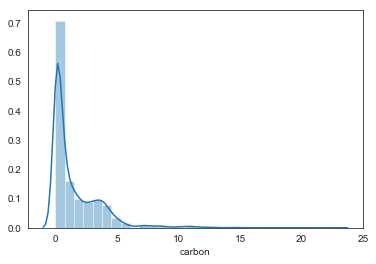

In [139]:
sns.distplot(df['carbon'], bins=30)
df.carbon.describe()
p=df['population']
pop=pd.cut(p, [10000,1000000,10000000000000], labels=['medium','large'])
pop
df['population']=pop
df.head()


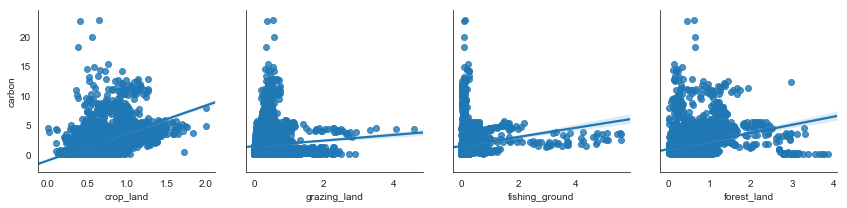

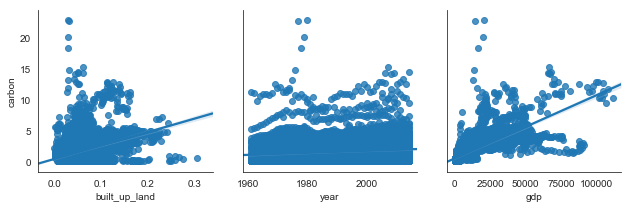

In [140]:
features=['crop_land','grazing_land','fishing_ground','forest_land','built_up_land','year','gdp']
n = 4
row_groups= [features[i:i+n] for i in range(0, len(features), n) ]
# sns.lmplot(x='crop_land', y='carbon',data=dfa,fit_reg=True)
for i in row_groups:
    sns.pairplot(data=df, y_vars=['carbon'],x_vars=i,kind='reg',height=3)

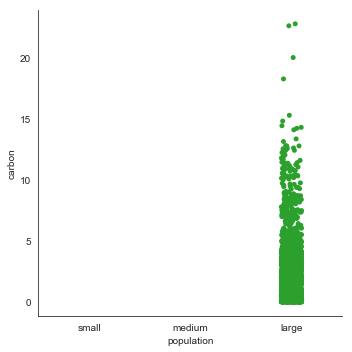

In [141]:
sns.catplot(x='population',y='carbon',data=df)

In [63]:
df['carbon'].describe()
# dfa.hist(column=['carbon'], bins=30)

NameError: name 'dfa' is not defined

In [25]:
df['crop_and_built']=df['crop_land']*df['built_up_land']

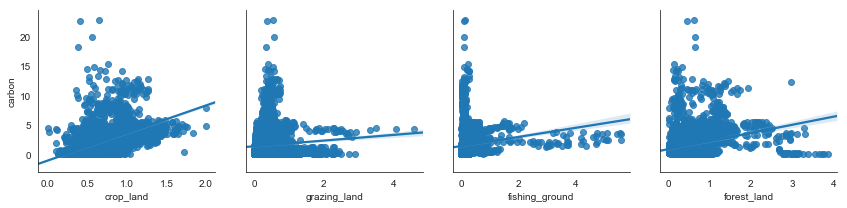

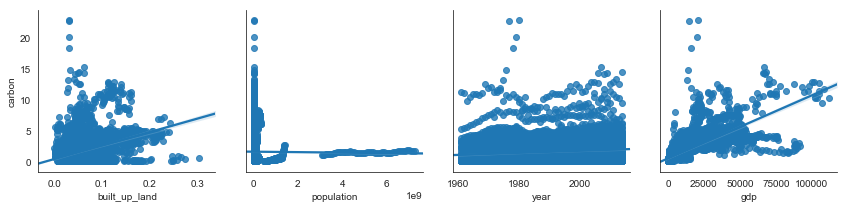

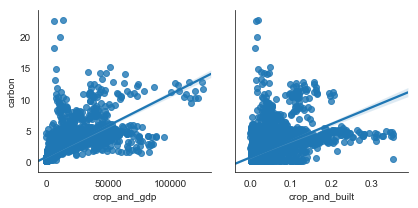

In [26]:
features=['crop_land','grazing_land','fishing_ground','forest_land','built_up_land','population','year','gdp','crop_and_gdp','crop_and_built']
n = 4
row_groups= [features[i:i+n] for i in range(0, len(features), n) ]
# sns.lmplot(x='crop_land', y='carbon',data=dfa,fit_reg=True)
for i in row_groups:
    sns.pairplot(data=df, y_vars=['carbon'],x_vars=i,kind='reg',height=3)

In [11]:
df['crop_and_gdp']=df['crop_land']*df['gdp']
df.head()

,country,year,record,crop_land,grazing_land,forest_land,fishing_ground,built_up_land,carbon,gdp,population,scaled_carbon,crop_and_gdp
2,Armenia,1992,EFConsPerCap,0.390923,0.189137,0.000001,0.004138,0.033669,1.112225,949.033,3449000,-0.212958,370.998394
12,Armenia,1993,EFConsPerCap,0.386611,0.200749,0.000011,0.003816,0.031968,0.535277,886.033,3370000,-0.486719,342.550039
22,Armenia,1994,EFConsPerCap,0.445495,0.317448,0.000023,0.003766,0.031476,0.317669,956.471,3290000,-0.589973,426.102735
32,Armenia,1995,EFConsPerCap,0.380362,0.196215,0.000017,0.003926,0.031497,0.416180,1043.540,3223000,-0.543230,396.923057
42,Armenia,1996,EFConsPerCap,0.441648,0.223205,0.000022,0.003030,0.035410,0.334686,1121.880,3173000,-0.581899,495.475734


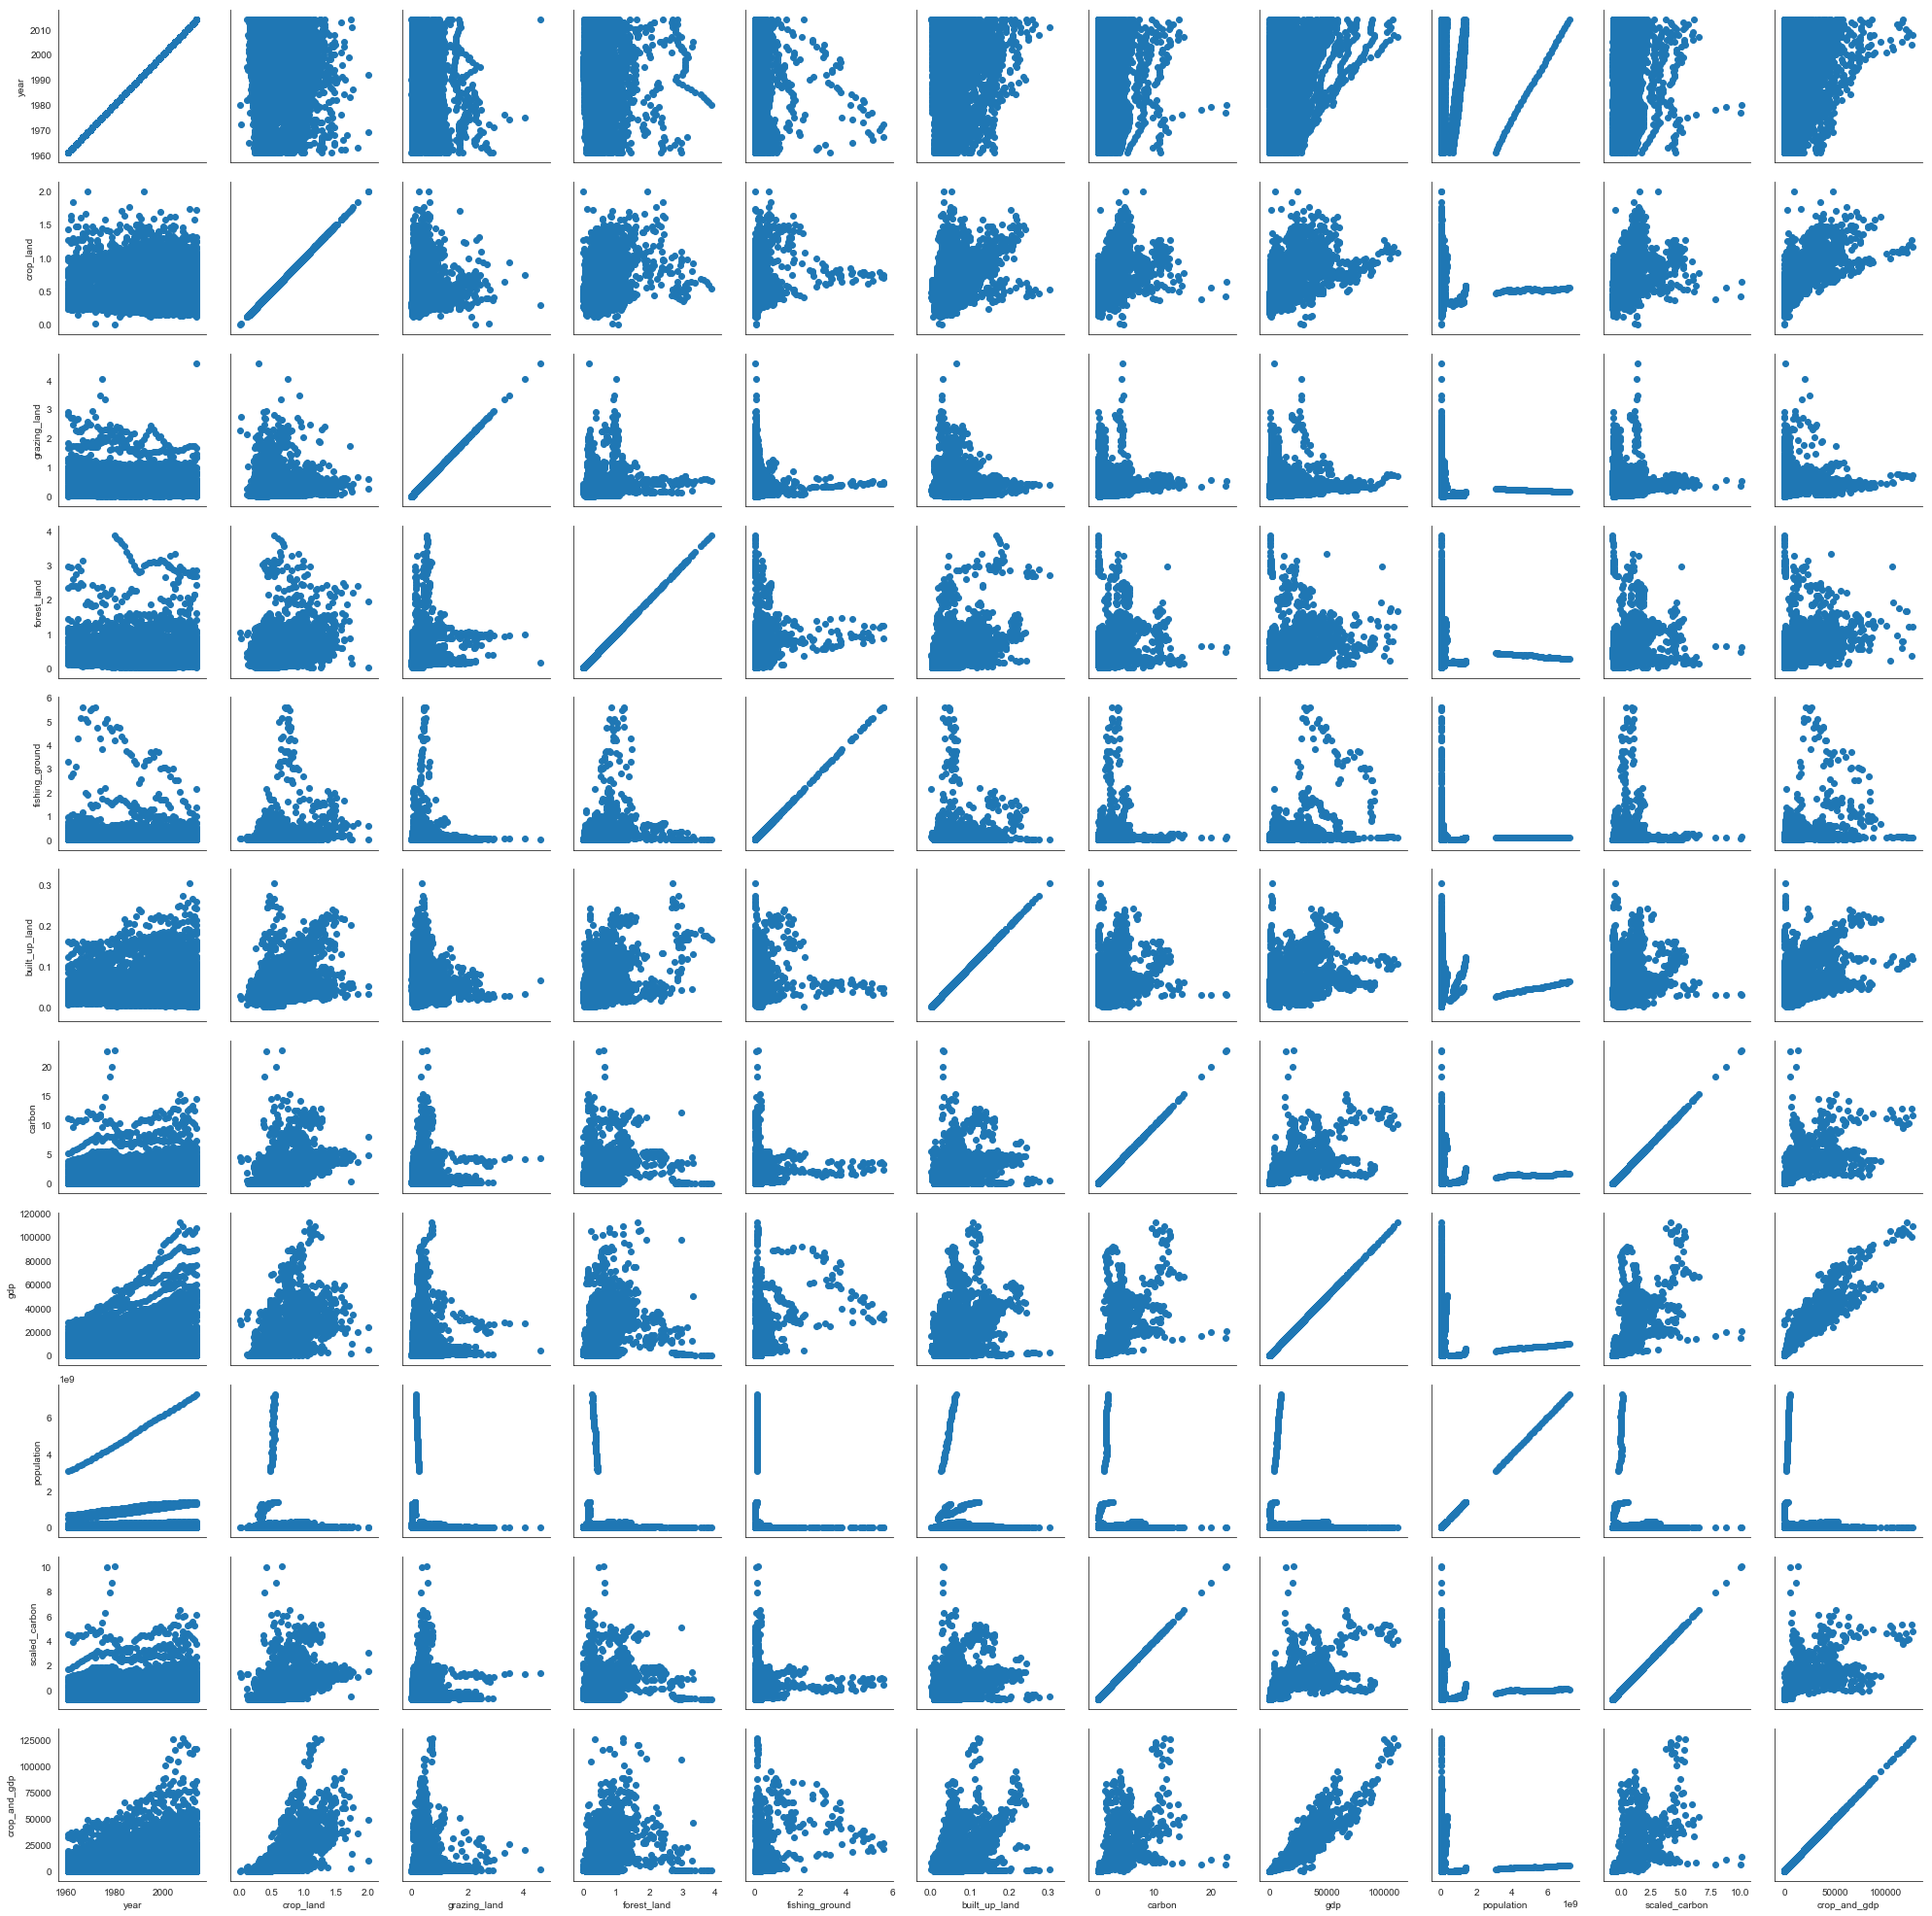

In [13]:
# sns.pairplot(data=dfa)
sns.PairGrid(df).map(plt.scatter)

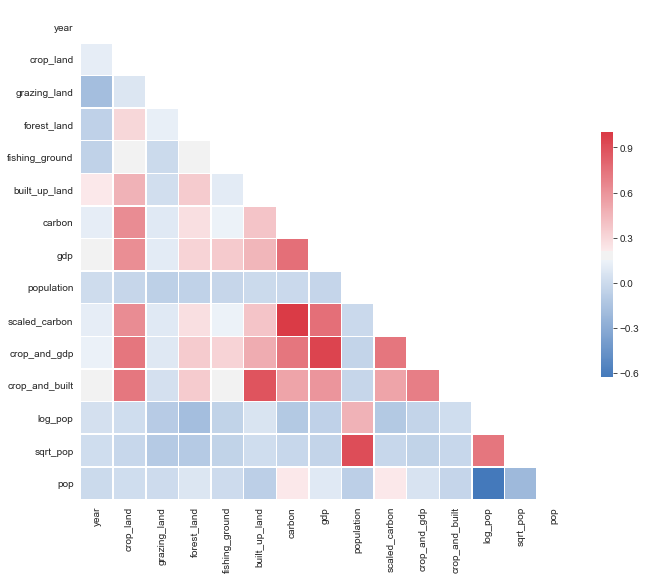

In [67]:
# model=smf.ols('carbon~population+crop_land+built_up_land',data=dfa).fit()
# model.summary()

corr=df.corr()
def CorrMtx(df, dropDuplicates = True):

    # Exclude duplicate correlations by masking uper right values
    if dropDuplicates:    
        mask = np.zeros_like(df, dtype=np.bool)
        mask[np.triu_indices_from(mask)] = True

    # Set background color / chart style
    sns.set_style(style = 'white')

    # Set up  matplotlib figure
    f, ax = plt.subplots(figsize=(11, 9))

    # Add diverging colormap from red to blue
    cmap = sns.diverging_palette(250, 10, as_cmap=True)

    # Draw correlation plot with or without duplicates
    if dropDuplicates:
        sns.heatmap(df, mask=mask, cmap=cmap, 
                square=True,
                linewidth=.5, cbar_kws={"shrink": .5}, ax=ax)
    else:
        sns.heatmap(df, cmap=cmap, 
                square=True,
                linewidth=.5, cbar_kws={"shrink": .5}, ax=ax)


CorrMtx(corr, dropDuplicates = True)


In [ ]:
model = smf.ols(formula='carbon~crop_land+grazing_land+forest_land+fishing_ground+built_up_land', data=dfg).fit()
model = smf.ols(formula='carbon~grazing_land+built_up_land+crop_land', data=dfg).fit()
model.summary()


In [34]:
model=smf.ols('carbon~crop_land+gdp',data=df).fit() #R-sq: 62.2% all pvals low (0.00)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 carbon   R-squared:                       0.622
Model:                            OLS   Adj. R-squared:                  0.622
Method:                 Least Squares   F-statistic:                     4477.
Date:                Tue, 20 Aug 2019   Prob (F-statistic):               0.00
Time:                        16:31:53   Log-Likelihood:                -9144.7
No. Observations:                5449   AIC:                         1.830e+04
Df Residuals:                    5446   BIC:                         1.832e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.3346      0.040     -8.316      0.000      -0.413      -0.256
crop_land      1.8698      0.079     23.664      0.000       1.715       2.025
gdp          8.05e-05   1.43e-06     56.393      0.000    7.77e-05    8.33e-05
==============================================================================
Omnibus:                     5094.504   Durbin-Watson:                   0.160
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           519167.659
Skew:                           4.150   Prob(JB):                         0.00
Kurtosis:                      50.093   Cond. No.                     9.40e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.4e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [57]:
model=smf.ols('carbon~crop_land+gdp+fishing_ground+population+year',data=df).fit() #R-sq: 62.2% all pvals low (0.00)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 carbon   R-squared:                       0.640
Model:                            OLS   Adj. R-squared:                  0.640
Method:                 Least Squares   F-statistic:                     1936.
Date:                Tue, 20 Aug 2019   Prob (F-statistic):               0.00
Time:                        16:48:14   Log-Likelihood:                -9009.8
No. Observations:                5449   AIC:                         1.803e+04
Df Residuals:                    5443   BIC:                         1.807e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          8.2492      2.296      3.592      0.000       3.747      12.751
crop_land          1.8402      0.077     23.856      0.000       1.689       1.991
gdp             8.853e-05   1.48e-06     59.806      0.000    8.56e-05    9.14e-05
fishing_ground    -0.7464      0.046    -16.380      0.000      -0.836      -0.657
population      6.677e-11    3.2e-11      2.087      0.037    4.05e-12    1.29e-10
year              -0.0043      0.001     -3.717      0.000      -0.007      -0.002
==============================================================================
Omnibus:                     5249.638   Durbin-Watson:                   0.173
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           553384.265
Skew:                           4.360   Prob(JB):                         0.00
Kurtosis:                      51.593   Cond. No.                     7.29e+10
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.29e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [58]:
model=smf.ols('carbon~population',data=df).fit() #R-sq: 62.2% all pvals low (0.00)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 carbon   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.4774
Date:                Tue, 20 Aug 2019   Prob (F-statistic):              0.490
Time:                        16:52:07   Log-Likelihood:                -11794.
No. Observations:                5449   AIC:                         2.359e+04
Df Residuals:                    5447   BIC:                         2.360e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.5645      0.029     53.967      0.000       1.508       1.621
population  -3.68e-11   5.33e-11     -0.691      0.490   -1.41e-10    6.76e-11
==============================================================================
Omnibus:                     3185.238   Durbin-Watson:                   0.079
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            35065.327
Skew:                           2.628   Prob(JB):                         0.00
Kurtosis:                      14.261   Cond. No.                     5.53e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.53e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""